# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнили студенты гр. 9382 Рыжих Роман и Сорочина Мария. Вариант №2

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.


## Основные теоретические положения

***Генеральная совокупность*** — это множество всех объектов, относительно которых предполагается делать выводы в рамках конкретного исследования. Генеральную совокупность составляют все объекты, которые отвечают всем заранее заданным параметрам.

***Выборка*** — это подмножество генеральной совокупности. 

***Ранжированный ряд*** - последовательность элементов выборки, расположенных в порядке неубывания их значений.

***Вариационный ряд*** - последовательность уникальных элементов выборки, расположенных в порядке возрастания их значений. 

***Интервальный ряд*** - это упорядоченное множество смежных интервалов и соответствующие им частоты, в сумме равные объему совокупности.

Количество интервалов можно вычислить по формуле Стерджесса:

$k=1+3.31\cdot lgN$

Ширина интервала вычисляется по формуле:

$h=\frac{x_{max}-x_{min}}{k}$

***Эмпирическая функция распределения*** - функция $F^* (х)$,
определяющая для каждого значения $х$ относительную
частоту события $X < х$.

## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Формирование выборки

Была выбрана генеральная совокупность: https://www.kaggle.com/datasets/brendan45774/test-file, из которой в дальнейшем использованы признаки 'Age' и 'Fare'. Для формирования выборки были удалены записи, в которых не указан возраст, далее выбраны первые 115 элементов.


In [1]:
import pandas as pd
import numpy as np
import math
from IPython.display import display, HTML
import matplotlib.pyplot as plt

df = pd.read_csv('titanic_dataset.csv')
df1 = df[np.isnan(df['Age'])]
data = df.drop(df1.index, axis=0)[:115][['Age', 'Fare']]

data.to_csv('data.csv', index=False)

display(HTML(data.to_html()))

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875
5,14.0,9.2250
6,30.0,7.6292
7,26.0,29.0000
8,18.0,7.2292
9,21.0,24.1500


### Последовательно преобразовать выборку в ранжированный, вариационный и интервальный ряды.

#### Первый признак (Age)

##### Ранжированный ряд


In [2]:
feature1 = data.loc[:, ['Age']]
ranked1 = feature1.sort_values(by='Age').set_index(pd.Index([i for i in range(1, 116)]))

display(HTML(ranked1.to_html()))

,Age
1,1.0
2,2.0
3,6.0
4,9.0
5,10.0
6,10.0
7,12.0
8,13.0
9,14.0
10,16.0


Первый элемент ранжированного ряда (1.0) является минимальным, последний (76.0) в свою очередь максимальным.

##### Вариационный ряд

In [3]:
variation1 = pd.DataFrame(ranked1.groupby(['Age'])['Age'].count())
display(HTML(variation1.to_html()))

,Age
Age,
1.0,1
2.0,1
6.0,1
9.0,1
10.0,2
12.0,1
13.0,1
14.0,1
16.0,1


По полученному ряду можно заметить, что чаще в выборке встречается значение возраста равное 24 (7 раз), также часто встречаются значения 21, 27, 18, 22, 25.

##### Интервальный ряд

Количество интервалов k вычислено по формуле Стерджесса: $k=1+3.31\cdot lgN$ и округлено до целого.

In [4]:
k = 1 + math.floor(3.31 * math.log10(len(data)))
k

7

Количество интервалов k = 7. Затем вычислена ширина интервала h по формуле:

$h=\frac{x_{max}-x_{min}}{k}$

In [5]:
x_min1 = ranked1['Age'][1]
x_max1 = ranked1['Age'][115]
h1 = math.ceil((x_max1 - x_min1) / k)
h1

11

Далее определяются границы интервалов, подсчитывается количество попаданий в каждый из интервалов (абсолютная частота), а также вычисляются середины интервалов, относительная частота каждого из интервалов, накопленные относительная и абсолютная частоты для каждого интервала.



In [6]:
bins1 = np.arange(x_min1, x_max1+h1, h1)
cuted1 = pd.cut(ranked1["Age"], bins1, right=False)

intervals1 = ranked1.groupby(cuted1, as_index=False)['Age'].count()
intervals1 = intervals1.rename(columns={'Age': 'частота попадания'})

cuted1 = sorted(list(set(cuted1)), key=lambda x: x.left) 

intervals1['interval'] = cuted1
intervals1["середина интервала"] = [i.right-h1/2 for i in cuted1]
intervals1['относительная частота'] = intervals1['частота попадания'] / len(data)
intervals1['накоп. абс. частота'] = [sum(intervals1['частота попадания'][:i+1]) for i in range(len(intervals1))]
intervals1['накоп. отн. частота'] = [sum(intervals1['относительная частота'][:i+1]) for i in range(len(intervals1))]

intervals1.iloc[:, [1, 2, 0, 3, 4, 5]].set_index(pd.Index([i for i in range(1, 8)]))


,interval,середина интервала,частота попадания,относительная частота,накоп. абс. частота,накоп. отн. частота
1,"[1.0, 12.0)",6.5,6,0.052174,6,0.052174
2,"[12.0, 23.0)",17.5,28,0.243478,34,0.295652
3,"[23.0, 34.0)",28.5,42,0.365217,76,0.660870
4,"[34.0, 45.0)",39.5,17,0.147826,93,0.808696
5,"[45.0, 56.0)",50.5,14,0.121739,107,0.930435
6,"[56.0, 67.0)",61.5,6,0.052174,113,0.982609
7,"[67.0, 78.0)",72.5,2,0.017391,115,1.000000


Можно заметить, что больше всего значений попали в промежуток \[23.0, 34.0), а также, что почти 88\% значений находятся в промежутке \[12, 56).

Накопленная абсолютная частота для последнего интервала равна 115, то есть размеру выборки, а относительная равна 1.0, то есть все значения выборки не превышают 78.0.

#### Второй признак (Fare)
##### Ранжированный ряд


In [7]:
feature2 = data.loc[:, ['Fare']]
ranked2 = feature2.sort_values(by='Fare').set_index(pd.Index([i for i in range(1, 116)]))
display(HTML(ranked2.to_html()))

,Fare
1,3.1708
2,7.0000
3,7.2250
4,7.2250
5,7.2250
6,7.2250
7,7.2292
8,7.2292
9,7.2500
10,7.2833


Первый элемент ранжированного ряда (3.1708) является минимальным, последний (263.0000) в свою очередь максимальным. У данного признака мы наблюдаем больший разброс значений, чем по признаку Age.

##### Вариационный ряд

In [8]:
variation2 = pd.DataFrame(ranked2.groupby(['Fare'])['Fare'].count())
display(HTML(variation2.to_html()))

,Fare
Fare,
3.1708,1
7.0000,1
7.2250,4
7.2292,2
7.2500,1
7.2833,1
7.6292,1
7.6500,1
7.7250,1


По полученному ряду можно заметить, что в выборке присутствует большое количество уникальных значений.

##### Интервальный ряд

Количество интервалов k уже было вычислено. (k = 7)

Формула вычисления ширины интервала h:

$h=\frac{x_{max}-x_{min}}{k}$

In [9]:
x_min2 = ranked2['Fare'][1]
x_max2 = ranked2['Fare'][115]
h2 = math.ceil((x_max2 - x_min2) / k)
h2

38

In [10]:
bins2 = np.arange(x_min2, x_max2+h2, h2)
cuted2 = pd.cut(ranked2["Fare"], bins2, right=False)

intervals2 = ranked2.groupby(cuted2, as_index=False)['Fare'].count()
intervals2 = intervals2.rename(columns={'Fare': 'частота попадания'})


cuted2 = [(round(bins2[i], 4), round(bins2[i+1], 4)) for i in range(len(bins2) - 1)]

intervals2['interval'] = cuted2
intervals2["середина интервала"] = [i[1]-h2/2 for i in cuted2]
intervals2['относительная частота'] = intervals2['частота попадания'] / len(data)
intervals2['накоп. абс. частота'] = [sum(intervals2['частота попадания'][:i+1]) for i in range(len(intervals2))]
intervals2['накоп. отн. частота'] = [sum(intervals2['относительная частота'][:i+1]) for i in range(len(intervals2))]

intervals2.iloc[:, [1, 2, 0, 3, 4, 5]].set_index(pd.Index([i for i in range(1, 8)]))


,interval,середина интервала,частота попадания,относительная частота,накоп. абс. частота,накоп. отн. частота
1,"(3.1708, 41.1708)",22.1708,87,0.756522,87,0.756522
2,"(41.1708, 79.1708)",60.1708,16,0.139130,103,0.895652
3,"(79.1708, 117.1708)",98.1708,1,0.008696,104,0.904348
4,"(117.1708, 155.1708)",136.1708,1,0.008696,105,0.913043
5,"(155.1708, 193.1708)",174.1708,0,0.000000,105,0.913043
6,"(193.1708, 231.1708)",212.1708,4,0.034783,109,0.947826
7,"(231.1708, 269.1708)",250.1708,6,0.052174,115,1.000000


Можно заметить, что больше всего значений (около 75%) попали в первый промежуток \[3.1708, 41.1708), а также, что около 89\% значений находятся в первых двух промежутках (\[3.1708, 79.1708)).


### Для абсолютных и относительных частот построить и отобразить графически полигон, гистограмму и эмпирическую функцию.

#### Первый признак (Age)

#### Полигон

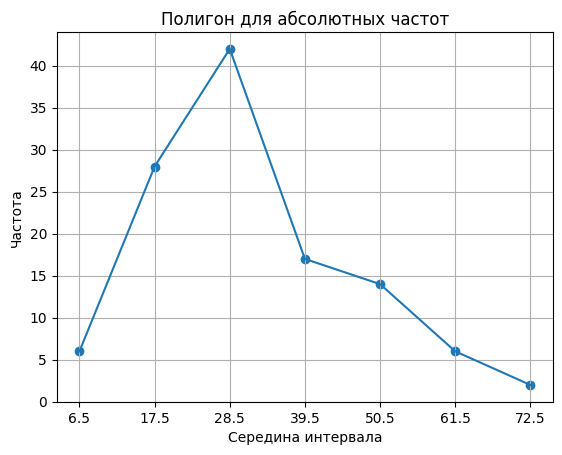

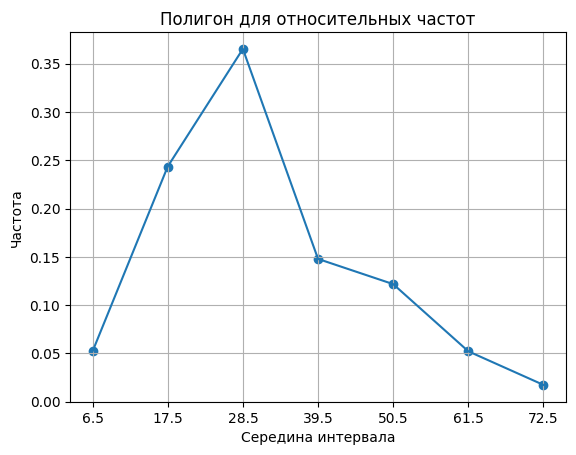

In [11]:
import matplotlib.pyplot as plt

plt.plot(intervals1['середина интервала'], intervals1['частота попадания'])
plt.scatter(intervals1['середина интервала'], intervals1['частота попадания'])
plt.ylabel('Частота')
plt.xlabel('Середина интервала')
plt.title('Полигон для абсолютных частот')
plt.grid()
x_ticks = intervals1['середина интервала']
plt.xticks(x_ticks)
plt.show()

plt.plot(intervals1['середина интервала'], intervals1['относительная частота'])
plt.scatter(intervals1['середина интервала'], intervals1['относительная частота'])
plt.ylabel('Частота')
plt.xlabel('Середина интервала')
plt.title('Полигон для относительных частот')
plt.grid()
x_ticks = intervals1['середина интервала']
plt.xticks(x_ticks)
plt.show()

##### Гистограмма

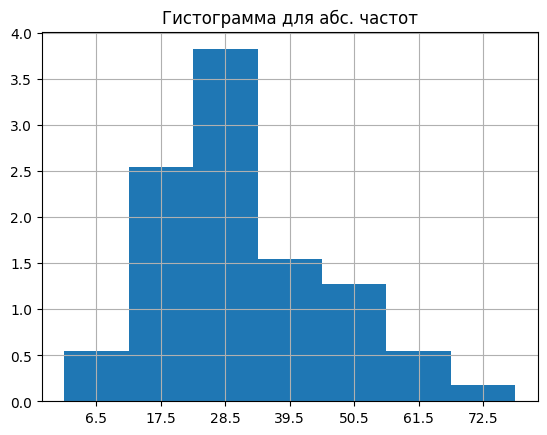

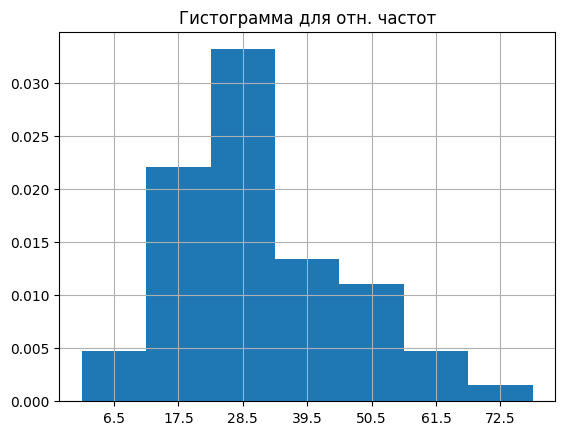

In [12]:
plt.hist(bins1[:-1], bins1, weights=intervals1['частота попадания'] / h1)
plt.title('Гистограмма для абс. частот')
plt.grid()
x_ticks = intervals1['середина интервала']
plt.xticks(x_ticks)
plt.show()

plt.hist(bins1[:-1], bins1, weights=intervals1['относительная частота'] / h1)
plt.title('Гистограмма для отн. частот')
plt.grid()
x_ticks = intervals1['середина интервала']
plt.xticks(x_ticks)
plt.show()

##### Эмпирическая функция

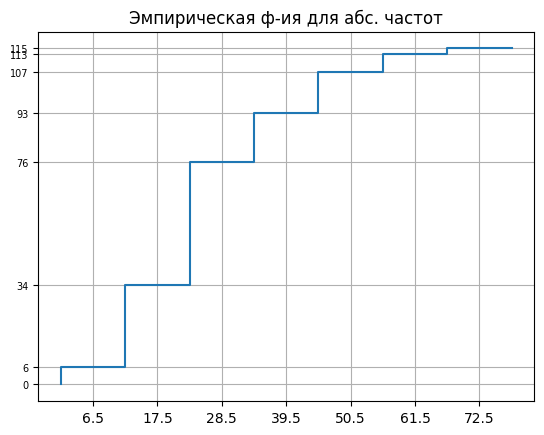

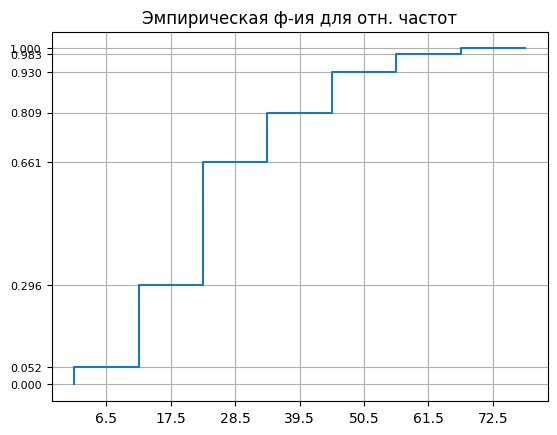

In [13]:
lst = list(intervals1['накоп. абс. частота'])
lst.insert(0, 0)
plt.step(bins1, lst)
plt.title('Эмпирическая ф-ия для абс. частот')
plt.grid()
x_ticks = intervals1['середина интервала']
plt.xticks(x_ticks)
plt.yticks(lst, fontsize=7)
plt.show()

lst = list(intervals1['накоп. отн. частота'])
lst.insert(0, 0)
plt.step(bins1, lst)
plt.title('Эмпирическая ф-ия для отн. частот')
plt.grid()
x_ticks = intervals1['середина интервала']
plt.xticks(x_ticks)
plt.yticks(lst, fontsize=8)
plt.show()

#### Второй признак (Fare)

##### Полигон

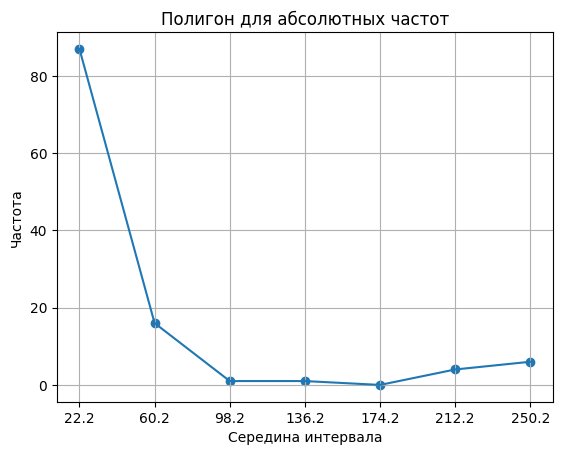

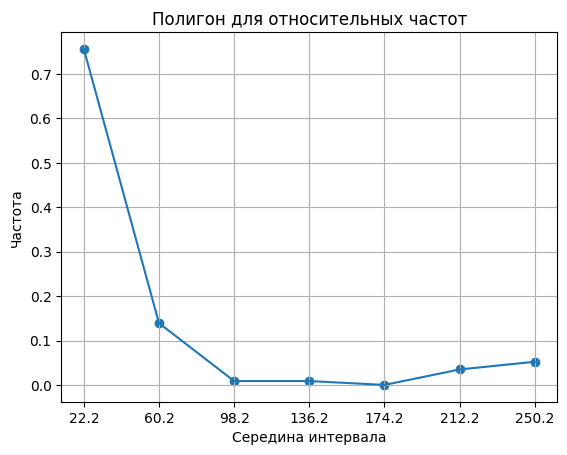

In [14]:
plt.plot(intervals2['середина интервала'], intervals2['частота попадания'])
plt.scatter(intervals2['середина интервала'], intervals2['частота попадания'])
plt.ylabel('Частота')
plt.xlabel('Середина интервала')
plt.title('Полигон для абсолютных частот')
plt.grid()
x_ticks = intervals2['середина интервала']
plt.xticks(x_ticks)
plt.show()

plt.plot(intervals2['середина интервала'], intervals2['относительная частота'])
plt.scatter(intervals2['середина интервала'], intervals2['относительная частота'])
plt.ylabel('Частота')
plt.xlabel('Середина интервала')
plt.title('Полигон для относительных частот')
plt.grid()
x_ticks = intervals2['середина интервала']
plt.xticks(x_ticks)
plt.show()

##### Гистограмма

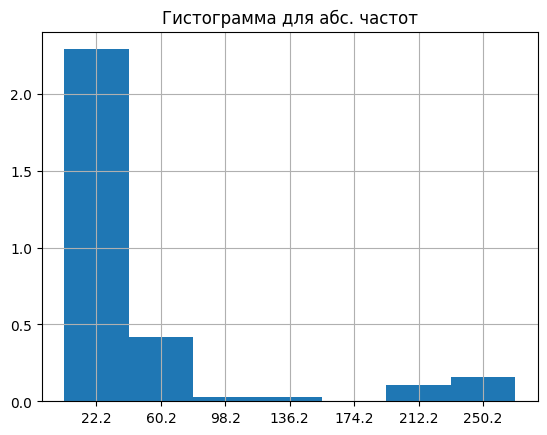

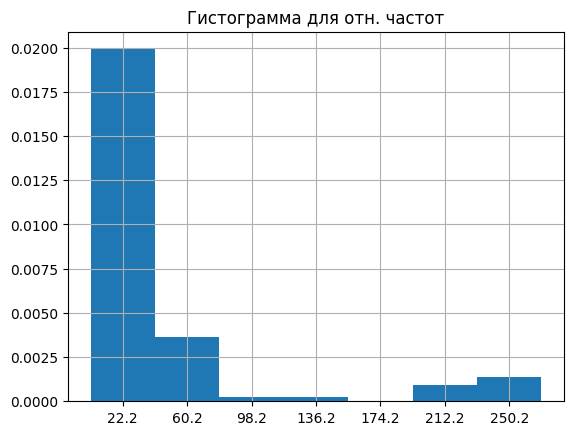

In [17]:
plt.hist(bins2[:-1], bins2, weights=intervals2['частота попадания'] / h2)
plt.title('Гистограмма для абс. частот')
plt.grid()
x_ticks = intervals2['середина интервала']
plt.xticks(x_ticks)
plt.show()

plt.hist(bins2[:-1], bins2, weights=intervals2['относительная частота'] / h2)
plt.title('Гистограмма для отн. частот')
plt.grid()
x_ticks = intervals2['середина интервала']
plt.xticks(x_ticks)
plt.show()

##### Эмпирическая функция

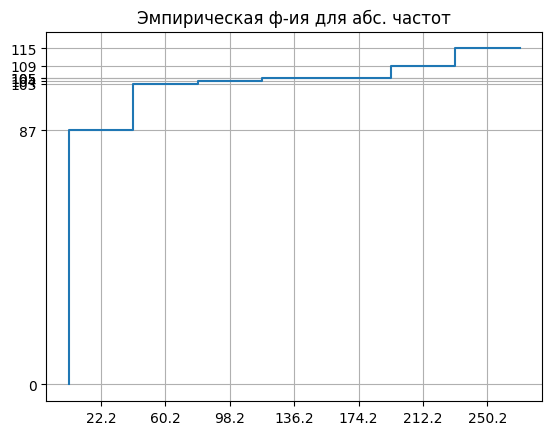

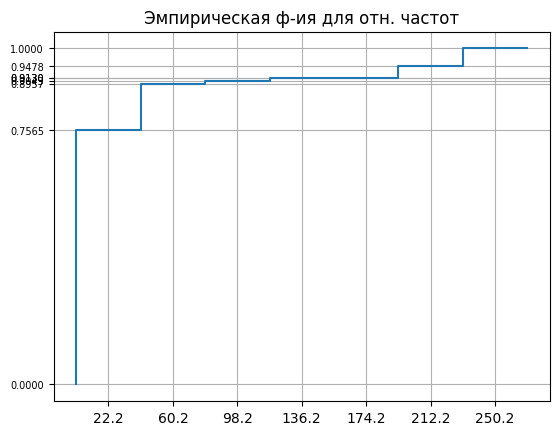

In [16]:
lst = list(intervals2['накоп. абс. частота'])
lst.insert(0, 0)
plt.step(bins2, lst)
plt.title('Эмпирическая ф-ия для абс. частот')
plt.grid()
x_ticks = intervals2['середина интервала']
plt.xticks(x_ticks)
plt.yticks(lst)
plt.show()

lst = list(intervals2['накоп. отн. частота'])
lst.insert(0, 0)
plt.step(bins2, lst)
plt.title('Эмпирическая ф-ия для отн. частот')
plt.grid()
x_ticks = intervals2['середина интервала']
plt.xticks(x_ticks)
plt.yticks(lst, fontsize=7)
plt.show()

## Выводы

В ходе выполнения работы была выбрана генеральная совокупность, из которой была сформирована выборка, содержащая 115 элементов.

Для каждого из признаков (age и fare) выборка была преобразована в ранжированный, вариационный и интервальный ряды. 

Для признака age были вычислены минимальное и максимальное значения: 1.0 и 76.0. Больше всего значений попали в промежуток $[23.0, 34.0)$, а также, приблизительно 88\% значений находятся в промежутке $[12, 56)$. 

Аналогично для признака fare были вычислены минимальное и максимальное значения: 3.1708 и 263.0. Больше всего значений (около 75%) попали в первый промежуток $[3.1708, 41.1708)$, а также, что около 89\% значений находятся в первых двух промежутках ($[3.1708, 79.1708)$). В выборке большое количество различных значений - 75, по первому признаку всего 52 различных значения.

Также были построены полигоны, гистограммы и график эмпирической функции распределения, по которым можно предположить, что распределение признака age близко к нормальному, а распределение fare стремится в экспоненциальному.

